In [ ]:
#color Thresholding 
## RGB ve HSV de brighness effectt RGBde tüm channellar etkilenirken HSV de sadece V etkilenir
#HSV de  H  0-179 ile , S ve V ise 0-255 arası değerler ile ifade edilir opencvde. ama gerçekte H 0-360 arası değer alır. 
# S ve V ise 0-100 arası değer alır.%lik
# color targetting için HSV kullanılır


In [7]:
!pip install matplotlib
!pip install opencv-python
!pip install numpy 

  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 3.7 MB/s eta 0:00:003.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 5.0 MB/s eta 0:00:004.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.2 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]ow]


In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [8]:
image = cv2.imread("./giraffe.jpg")


In [10]:
image_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image , cv2.COLOR_BGR2HSV)


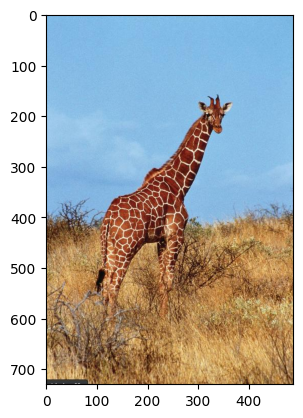

In [13]:
plt.imshow(image_rgb)


In [15]:
lower_white = np.array([0,0,179])
upper_white = np.array([30,80,255])


In [17]:
mask = cv2.inRange(image_hsv , lower_white , upper_white)

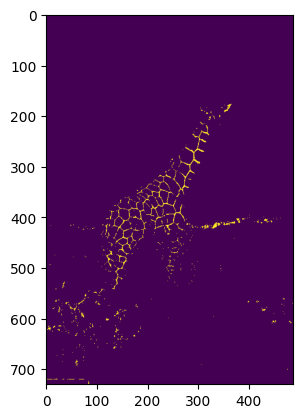

In [19]:
plt.imshow(mask)

In [31]:
black_hsv = np.uint8([[[120 , 255 , 0]]])

black_bgr = cv2.cvtColor(black_hsv , cv2.COLOR_HSV2BGR)[0][0]

In [32]:
image_result = image.copy()
image_result[mask>0] = black_bgr

In [33]:
image_result_rgb = cv2.cvtColor(image_result , cv2.COLOR_BGR2RGB)


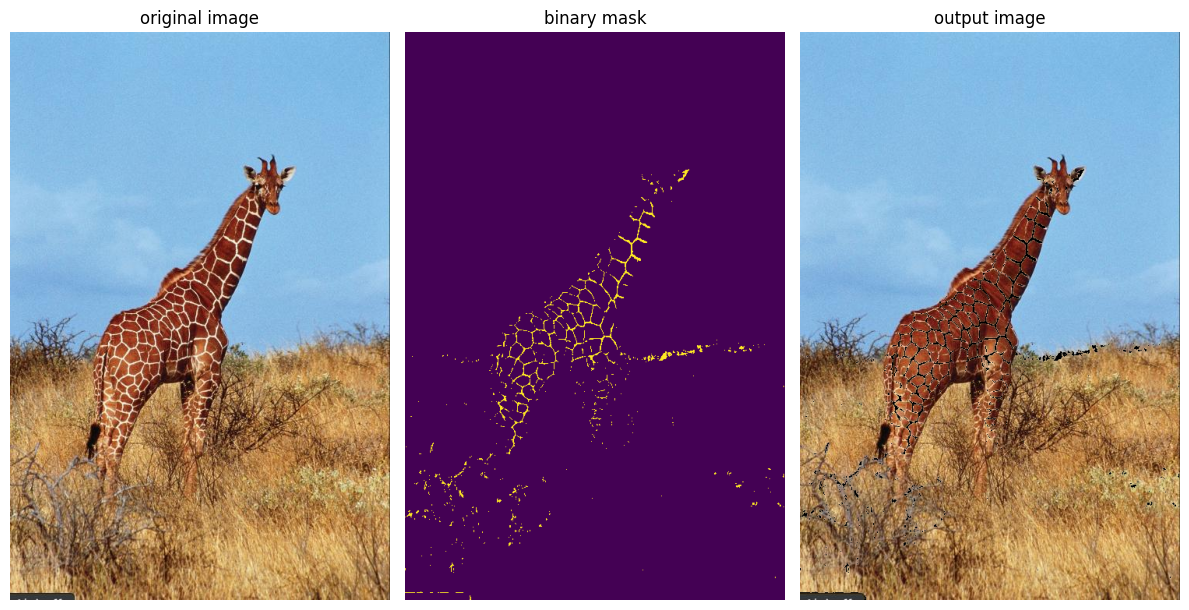

In [34]:
fig , axs  = plt.subplots( 1,3 , figsize = (12,6))
axs[0].imshow(image_rgb)
axs[0].set_title("original image")
axs[0].axis('off')

axs[1].imshow(mask)
axs[1].set_title("binary mask")
axs[1].axis('off')

axs[2].imshow(image_result_rgb)
axs[2].set_title("output image")
axs[2].axis('off')

plt.tight_layout()
plt.show()